# Introduction

I will be evaluating the properties and predicting the qualities of the Portuguese "Vinho Verde" wine obtained from the dataset.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Loading the Data

In [2]:
wine_quality_csv = pd.read_csv('/content/winequality-red.csv')
wine_quality = pd.DataFrame(wine_quality_csv)

## Understanding the Data

In [3]:
wine_quality.head(n = 10) #First 10 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
wine_quality.tail(n = 10) #last 10 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
wine_quality.shape #Confirming the the count of rows and columns

(1599, 12)

In [6]:
wine_quality.info() #Basic information on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine_quality.describe() #Statistical information on the dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Integrity Checks

In [8]:
wine_quality.duplicated().value_counts() #To check for duplicates

,count
False,1359
True,240


There are duplicate values in the dataframe but this cannot be taken into account as something that could affect the analysis because the records in the dataset are physicochemical and sensory values which could be similar.

In [9]:
wine_quality.isnull().sum() #To check for null values

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [10]:
wine_quality.isna().sum() #To check for empty values. This is because Null and Empty values are not the same in Python

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


# Analysis and Visualization

I want to predict the quality of wines, so I need to confirm how many distinct quality values of wines are available in the dataset, visualize the count of all wines in the dataset per quality value and determine which wine properties are positively correlated to its quality.

In [11]:
wine_quality['quality'].unique() #Checking the distinct quality values in the dataset

array([5, 6, 7, 4, 8, 3])

In [12]:
wine_quality['quality'].value_counts() #Checking the records (Wines) count and their respective quality values

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


<Figure size 500x500 with 0 Axes>

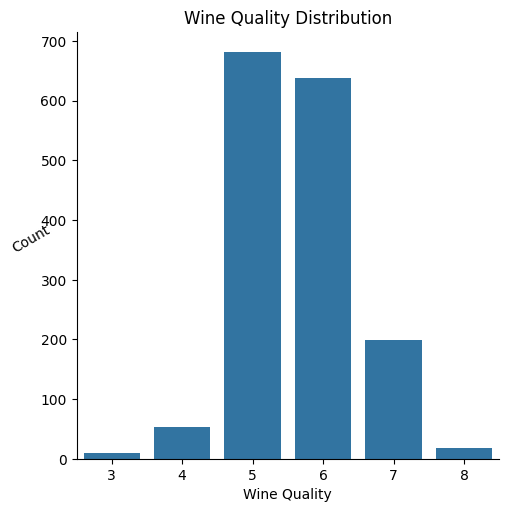

In [13]:
#Visualizing the information for better understanding

plt.figure(figsize=(5,5))
sns.catplot(x='quality', data = wine_quality, kind = 'count')
plt.title('Wine Quality Distribution')
plt.xlabel('Wine Quality')
plt.ylabel('Count', rotation = 30)
plt.show()

Most of the wines are of average quality and fewer are bad or good. <br> Now that I have ample information on the wine qualities, I need to check which other properties of the wines are correlelated or related to the wine quality.

In [14]:
correlation = wine_quality.corr()

In [15]:
# correlation values of GLD
print(correlation['quality'])

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


<Axes: >

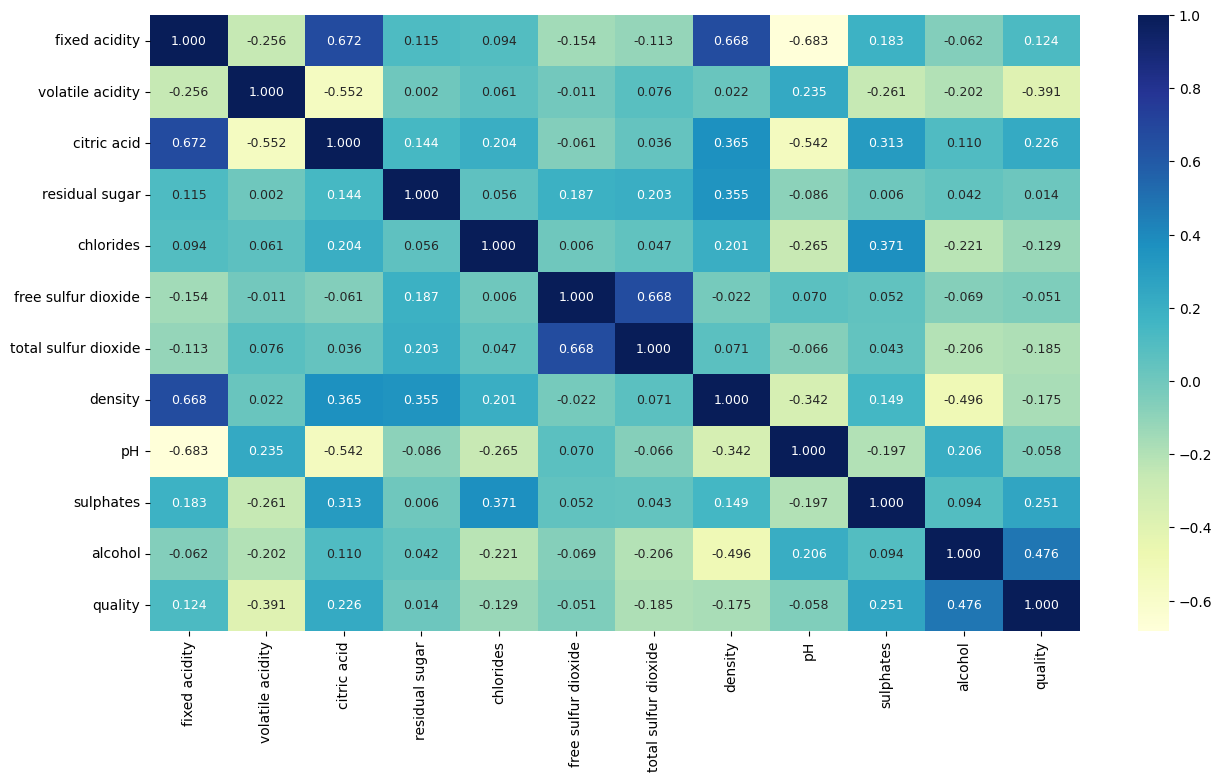

In [21]:
# To visualize the correlations with a heatmap
plt.figure(figsize = (15,8))
sns.heatmap(correlation, cbar=True, fmt='.3f',annot=True, annot_kws={'size':9}, cmap="YlGnBu")

Visual assessment of all the charts indicate that wine quality is much more positively correlated to its alcohol content at 0.476 compared to other properties.

# Model Building

## Training the Machine Learning Model

I need to split the dataset into testing and training segments.
<br>The training data will be a subset of original data used to train the model, and the testing data will be used to check the accuracy of the model.

Before doing that, I need to assign the columns of the dataset that will be the features and the one to be the target.
<br><br>The target (Y) will be the good qualities of wine that I want to predict and gain more understanding on. While the features (X) are the other properties of the wine that will be used to generate the information on the target.
<br><br>To get X, I need to remove the quality column from the dataset.
<br><br>To get Y, I need focus on only the good qualities (7 & 8) of the wine, through Label Binarization by splitting the qualities into two categories of good(>=7) or bad(<=6). To do this I need to replace all bad values and good values in the dataset with 0 and 1 respectively, for ease during the model training.

In [22]:
X = wine_quality.drop("quality", axis="columns") #Removing the quality column

In [23]:
X #Confirming the features to check that the quality column has been removed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [24]:
Y = wine_quality['quality']

In [25]:
Y.value_counts() #Confirming the replacement

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2) #Testing the model with 10% of the dataset and training it with 90% of the model

In [ ]:
model=LogisticRegression()

In [27]:
classifier = model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluating the ML model

In [28]:
X_test_prediction = classifier.predict(X_test) #To confirm the predicted values in the ML model
X_test_prediction

array([6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6,
       6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5,
       5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6,
       6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 4, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5,
       6, 6, 6, 5, 5, 6])

In [29]:
accuracy_score(X_test_prediction, Y_test) #To check the accuracy of the ML model

0.63125

# Conclusion

The model is 63.125% accurate in predicting the quality of the Portuguese "Vinho Verde" wine.